# Second Modelling Iteration

In [83]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sklearn Libraries
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, classification_report, accuracy_score, f1_score, matthews_corrcoef, precision_score, recall_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read in the data
data = pd.read_pickle('./dataset/data90.pkl')

In [6]:
# Preview the first 5 rows
data.head()

,hospital_death,age,elective_surgery,height,readmission_status,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,hospital_admit_source_ICU,hospital_admit_source_ICU to SDU,hospital_admit_source_Observation,hospital_admit_source_Operating Room,hospital_admit_source_Other,hospital_admit_source_Other Hospital,hospital_admit_source_Other ICU,hospital_admit_source_PACU,hospital_admit_source_Recovery Room,hospital_admit_source_Step-Down Unit (SDU)
0,0,68.0,0,180.3,0,2.3,113.0,502.01,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,77.0,0,160.0,0,3.1,108.0,203.01,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,25.0,0,172.7,0,3.1,122.0,703.03,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,81.0,1,165.1,0,3.1,203.0,1206.03,1,0.0,...,0,0,0,1,0,0,0,0,0,0
4,0,19.0,0,188.0,0,3.1,119.0,601.01,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Statistical summary of the data
print(data.describe())

       hospital_death           age  elective_surgery        height  \
count    91713.000000  91713.000000      91713.000000  91713.000000   
mean         0.086302     62.433548          0.183736    169.648256   
std          0.280811     16.393595          0.387271     10.716719   
min          0.000000     16.000000          0.000000    137.200000   
25%          0.000000     53.000000          0.000000    162.560000   
50%          0.000000     65.000000          0.000000    170.100000   
75%          0.000000     75.000000          0.000000    177.800000   
max          1.000000     89.000000          1.000000    195.590000   

       readmission_status  albumin_apache  apache_2_diagnosis  \
count             91713.0    91713.000000        91713.000000   
mean                  0.0        3.019793          184.089693   
std                   0.0        0.445681           85.812818   
min                   0.0        1.200000          101.000000   
25%                   0.0        3.

In [8]:
# Set up dependent and independent variables
X = data.drop(columns = 'hospital_death', axis = 1)
y = data['hospital_death']

In [62]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify = y)

In [10]:
# Shape of the training set
print("X_train has ", X_train.shape[0], " rows and ", X_train.shape[1], " columns.")

X_train has  64199  rows and  227  columns.


In [11]:
# Shape of testing set
print("X_test has ", X_test.shape[0], " rows and ", X_test.shape[1], " columns.")

X_test has  27514  rows and  227  columns.


### Baseline Model

In [12]:
# # Baseline model


In [13]:
# # Fit dummy classifier of training set
# dummy_clf.fit(X_train, y_train)

In [14]:
# # Score dummy classifier on test set
# dummy_clf.score(X_test, y_test)

In [15]:
# # Making predictions on test set
# dummy_preds = dummy_clf.predict(X_test)

In [16]:
# # Classification Report
# print(classification_report(y_test, dummy_preds))

In [17]:
# # roc_auc_score
# dummy_auc = roc_auc_score(y_test, dummy_preds)
# print('AUC: %.2f' % dummy_auc)

### Logistic Regression

In [18]:
# Build a generic classify function

In [19]:
def classify(est, X_train, y_train, X_test, y_test):
    # Passing the model and train_test dataset to fit the model
    est.fit(X_train, y_train)
    
    # Predicting the probability of the test data
    y2 = est.predict_proba(X_test)
    y_pred = est.predict(X_test)
    
    # Evaluation of models
    print('Accuracy: ',accuracy_score(y_test, y_pred))
    print('Area under the ROC curve: ',roc_auc_score(y_test, y2[:, 1]))
    
    
    # Calculate differect metrics
    print('F1-score: ',f1_score(y_test, y_pred))
    print(' ')
    print('Classification report: ')
    print(classification_report(y_test, y_pred))
    print(' ')
    print('Evaluation by cross-validation:')
    print(cross_val_score(est, X_train, y_train))
    print('\n')
    print('\n')
    print('Confusion Matrix: ')
    print(plot_confusion_matrix(est, X_test, y_test, cmap = 'YlOrBr'))
    
    return est, y_pred, y2[:, 1]

Accuracy:  0.8448062804390493
Area under the ROC curve:  0.4951358698269202
F1-score:  0.09380305602716468
 
Classification report: 
              precision    recall  f1-score   support

           0       0.91      0.92      0.92     25139
           1       0.09      0.09      0.09      2375

    accuracy                           0.84     27514
   macro avg       0.50      0.50      0.50     27514
weighted avg       0.84      0.84      0.84     27514

 
Evaluation by cross-validation:
[0.8423676  0.84338006 0.84314642 0.84602804 0.84266687]




Confusion Matrix: 


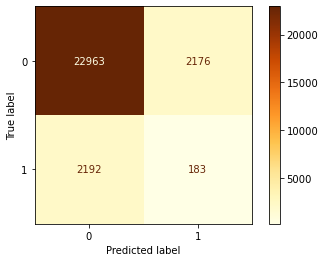

In [24]:
## Baseline Model
dummy, y_d, y_d2 = classify(DummyClassifier(), X_train, y_train, X_test, y_test)

Accuracy:  0.9271643526931744
Area under the ROC curve:  0.8838141616821001
F1-score:  0.4191304347826087
 
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     25139
           1       0.67      0.30      0.42      2375

    accuracy                           0.93     27514
   macro avg       0.81      0.65      0.69     27514
weighted avg       0.91      0.93      0.91     27514

 
Evaluation by cross-validation:
[0.9271028  0.92655763 0.92725857 0.92484424 0.92764234]




Confusion Matrix: 


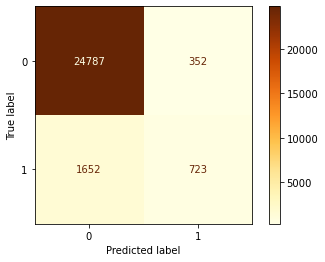

In [20]:
# LogisticRegression

logit, y_p, y_p2 = classify(LogisticRegression(solver = 'liblinear'), X_train, y_train, X_test, y_test)

Accuracy:  0.9309079014319983
Area under the ROC curve:  0.8935264267514724
F1-score:  0.4497829232995658
 
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     25139
           1       0.72      0.33      0.45      2375

    accuracy                           0.93     27514
   macro avg       0.83      0.66      0.71     27514
weighted avg       0.92      0.93      0.92     27514

 
Evaluation by cross-validation:
[0.93123053 0.92975078 0.92897196 0.92601246 0.93215983]




Confusion Matrix: 


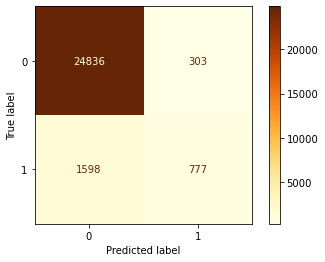

In [21]:
# Gradientboosting Classifier
gboost, y_pred_1, y_pred_2 = classify(GradientBoostingClassifier(), X_train, y_train, X_test, y_test)

Accuracy:  0.9301083084974922
Area under the ROC curve:  0.8801398372417777
F1-score:  0.4146118721461187
 
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     25139
           1       0.75      0.29      0.41      2375

    accuracy                           0.93     27514
   macro avg       0.84      0.64      0.69     27514
weighted avg       0.92      0.93      0.92     27514

 
Evaluation by cross-validation:
[0.9288162  0.92920561 0.92788162 0.92694704 0.9310694 ]




Confusion Matrix: 


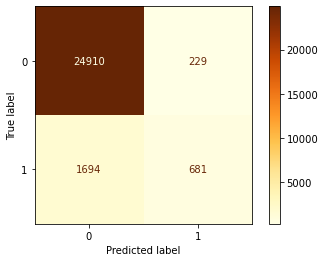

In [22]:
# RandomForest Classifier
rfc, y_pred_3, y_pred_3 = classify(RandomForestClassifier(), X_train, y_train, X_test, y_test)

Accuracy:  0.8813694846260086
Area under the ROC curve:  0.6464566819012606
F1-score:  0.345367027677497
 
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     25139
           1       0.33      0.36      0.35      2375

    accuracy                           0.88     27514
   macro avg       0.63      0.65      0.64     27514
weighted avg       0.89      0.88      0.88     27514

 
Evaluation by cross-validation:
[0.88403427 0.88154206 0.88738318 0.87936137 0.8855051 ]




Confusion Matrix: 


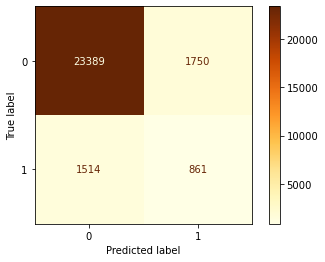

In [25]:
# Decision Tree Classifier
dtc, y_pred4, y_pred4 = classify(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

Accuracy:  0.8306316784182598
Area under the ROC curve:  0.8330044363863236
F1-score:  0.3988648090815273
 
Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.85      0.90     25139
           1       0.29      0.65      0.40      2375

    accuracy                           0.83     27514
   macro avg       0.63      0.75      0.65     27514
weighted avg       0.90      0.83      0.86     27514

 
Evaluation by cross-validation:
[0.82943925 0.82990654 0.83271028 0.82827103 0.83651375]




Confusion Matrix: 


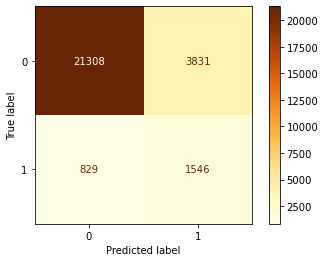

In [26]:
# Naive Bayes
nbc, y_nbp, ynbp = classify(GaussianNB(), X_train, y_train, X_test, y_test)

Accuracy:  0.9271280075597877
Area under the ROC curve:  0.8850062117783022
F1-score:  0.45053439298437925
 
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     25139
           1       0.65      0.35      0.45      2375

    accuracy                           0.93     27514
   macro avg       0.79      0.66      0.71     27514
weighted avg       0.92      0.93      0.92     27514

 
Evaluation by cross-validation:
[0.92515576 0.92476636 0.92616822 0.92352025 0.92873277]




Confusion Matrix: 


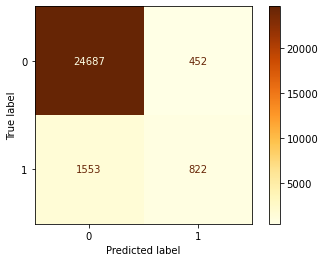

In [27]:
# Adaptive Boosting
ada, ada_pred1, ada_pred2 = classify(AdaBoostClassifier(), X_train, y_train, X_test, y_test)

In [29]:
# Instantiate Scaler Object
scaler = StandardScaler()

In [30]:
# Scale data
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [36]:
# LightGBM Classifier
lgb = LGBMClassifier()

In [38]:
fit_model = lgb.fit(scaled_X_train, y_train)

In [40]:
y_pred = fit_model.predict(scaled_X_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     25139
           1       0.72      0.35      0.47      2375

    accuracy                           0.93     27514
   macro avg       0.83      0.67      0.72     27514
weighted avg       0.92      0.93      0.92     27514



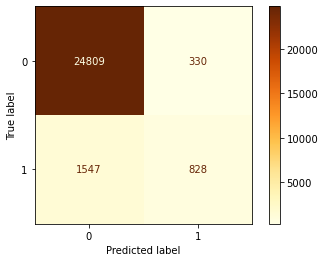

In [42]:
plot_confusion_matrix(lgb, scaled_X_test, y_test, cmap = 'YlOrBr')

In [45]:
print(roc_auc_score(y_test, y_pred))

0.6677522825720572


In [80]:
# # To predict the ROC curve for various models and find the best one

def run_models(X_train, y_train, X_test, y_test):
    clfs = {'GradientBoosting': GradientBoostingClassifier(max_depth = 6, n_estimators = 100, max_features = 0.3),
           'LogisticRegression': LogisticRegression(solver = 'saga', max_iter = 50, C = 1),
           'RandomForestClassifier': RandomForestClassifier(max_depth = 6, n_jobs = -1, n_estimators = 100),
           'AdaBoosting': AdaBoostClassifier(n_estimators = 100),
           #'LightGBM': LGBMClassifier(n_estimators = 50, n_jobs = -1),
           'DecisionTreeClassifier': DecisionTreeClassifier(max_depth = 6),
           }
    
    cols = ['model', 'matthews_corrcoef', 'roc_auc_score','precision', 'recall', 'f1_score']
    
    models_report = pd.DataFrame(columns = cols)
    
    conf_matrix = dict()
    
    for clf, clf_name in zip(clfs.values(), clfs.keys()):
        
        clf.fit(X_train, y_train)
        
        y_pred = clf.predict(X_test)
        y_score = clf.predict_proba(X_test)[:, 1]
        
        # print('Computing {} {} '.format(clf_name))
        
        tmp = pd.Series({#'model_type': model_type,
                        'model': clf_name,
                        'ROC AUC SCORE': roc_auc_score(y_test, y_score),
                        'Matthews Corr Coef': matthews_corrcoef(y_test, y_pred),
                        'Precision Score': precision_score(y_test, y_pred),
                        'Recall Score': recall_score(y_test, y_pred),
                        'F1 Score': f1_score(y_test, y_pred)})
        
        models_report = models_report.append(tmp, ignore_index = True)
        conf_matrix [clf_name] = pd.crosstab(y_test, y_pred, rownames = ['True'], colnames = ['Predicted'], margins = False)
        fpr, tpr, thresholds = roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)
        
        plt.figure(1, figsize=(6, 6))
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.title('ROC Curves for All Classifiers')
        plt.plot(fpr, tpr, label = clf_name)
        plt.legend(loc = 2, prop = {'size' :11})
    plt.plot([0,1], [0,1], color = 'black')
    
    return models_report, conf_matrix

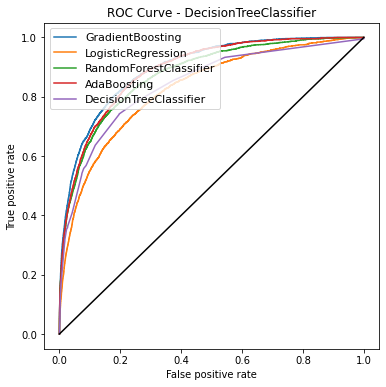

In [81]:
models_report, conf_matrix = run_models(X_train, y_train, X_test, y_test)

In [82]:
print(models_report)

                    model matthews_corrcoef roc_auc_score precision recall  \
0        GradientBoosting               NaN           NaN       NaN    NaN   
1      LogisticRegression               NaN           NaN       NaN    NaN   
2  RandomForestClassifier               NaN           NaN       NaN    NaN   
3             AdaBoosting               NaN           NaN       NaN    NaN   
4  DecisionTreeClassifier               NaN           NaN       NaN    NaN   

  f1_score  F1 Score  Matthews Corr Coef  Precision Score  ROC AUC SCORE  \
0      NaN  0.467222            0.461352         0.686531       0.896954   
1      NaN  0.234359            0.280223         0.654440       0.826616   
2      NaN  0.297418            0.363685         0.815094       0.875869   
3      NaN  0.455440            0.443318         0.649260       0.890399   
4      NaN  0.315618            0.350662         0.699422       0.841589   

   Recall Score  
0      0.354105  
1      0.142737  
2      0.181895  
3 

### Third Modelling Iteration

In [84]:
# Instantiate the SMOTE Object for resampling
smt = SMOTE()
# X_train, y_train
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

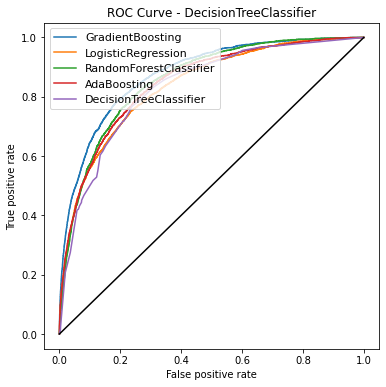

In [85]:
# Second Models report
models_report2, conf_matrix2 = run_models(X_train_sm, y_train_sm, X_test, y_test)

In [88]:
print(models_report2)

                    model matthews_corrcoef roc_auc_score precision recall  \
0        GradientBoosting               NaN           NaN       NaN    NaN   
1      LogisticRegression               NaN           NaN       NaN    NaN   
2  RandomForestClassifier               NaN           NaN       NaN    NaN   
3             AdaBoosting               NaN           NaN       NaN    NaN   
4  DecisionTreeClassifier               NaN           NaN       NaN    NaN   

  f1_score  F1 Score  Matthews Corr Coef  Precision Score  ROC AUC SCORE  \
0      NaN  0.475120            0.437615         0.550139       0.877485   
1      NaN  0.356054            0.323156         0.234192       0.837093   
2      NaN  0.407531            0.368286         0.288698       0.857060   
3      NaN  0.428933            0.375082         0.429658       0.848226   
4      NaN  0.381564            0.322879         0.291899       0.832448   

   Recall Score  
0      0.418105  
1      0.742316  
2      0.692632  
3 